<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/F1_and_F3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col='time HHMMSS')
data.head()

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450


In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450
...,...,...,...
15:26:59,19262.45,19253.006319,19251.850
15:27:39,19272.85,19253.304164,19252.500
15:28:19,19283.15,19254.661953,19253.200


In [ ]:
data['Spot Price Past Values']=data['Spot price ltp NIFTY50'].shift(1)
data.dropna(inplace=True)

data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT,Spot Price Past Values
time HHMMSS,,,,
09:15:10,19361.80,19338.013578,19340.300,19375.55
09:15:51,19358.50,19341.881400,19342.100,19361.80
09:16:31,19374.25,19355.645595,19355.450,19358.50
09:17:11,19374.25,19355.705598,19356.450,19374.25
09:17:51,19375.15,19357.768122,19357.600,19374.25
...,...,...,...,...
15:26:59,19262.45,19253.006319,19251.850,19257.30
15:27:39,19272.85,19253.304164,19252.500,19262.45
15:28:19,19283.15,19254.661953,19253.200,19272.85


In [ ]:
X = data[['price NIFTY23AUGFUT','Price of Synthetic option derived future','Spot Price Past Values']]
y = data['Spot price ltp NIFTY50']
scaler=StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , shuffle=False,random_state = 0)
X_train_normalized = scaler.fit_transform(x_train)
X_test_normalized = scaler.transform(x_test)
#y_train_normalized=scaler.transform(y_train)
#y_test_normalized=scaler.transform(y_test)


In [ ]:
regressor=LinearRegression()
model=regressor.fit(X_train_normalized,y_train)
regressor.intercept_,regressor.coef_

(19322.644494382017, array([ 3.45646317,  3.47274172, 18.82863411]))

In [ ]:
y_pred_train=regressor.predict(X_train_normalized)
y_pred=regressor.predict(X_test_normalized)

In [ ]:
#Evaluation metrics
accuracy=model.score(X_train_normalized,y_train)
accuracy1=model.score(X_test_normalized,y_test)
print("Training Accuracy:", accuracy)
print("Testing  Accuracy:", accuracy1)
print("MSE(Testing): ",mean_squared_error(y_test, y_pred))
print("MSE(Training): ",mean_squared_error(y_train, y_pred_train))
print("RMSE(Training):",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("RMSE(Testing):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score(TR): ",r2_score(y_train, y_pred_train))
print("R2 Score(Testing): ",r2_score(y_pred, y_test))


Training Accuracy: 0.9885200407000397
Testing  Accuracy: 0.8125041890707181
MSE(Testing):  37.250289858877906
MSE(Training):  7.615058002801464
RMSE(Training): 2.759539454836887
RMSE(Testing): 6.10330155398518
R2 Score(TR):  0.9885200407000397
R2 Score(Testing):  0.7419774398711891


Text(0.5, 1.0, 'Actual Vs Predicted Price in Testing Data(F3)')

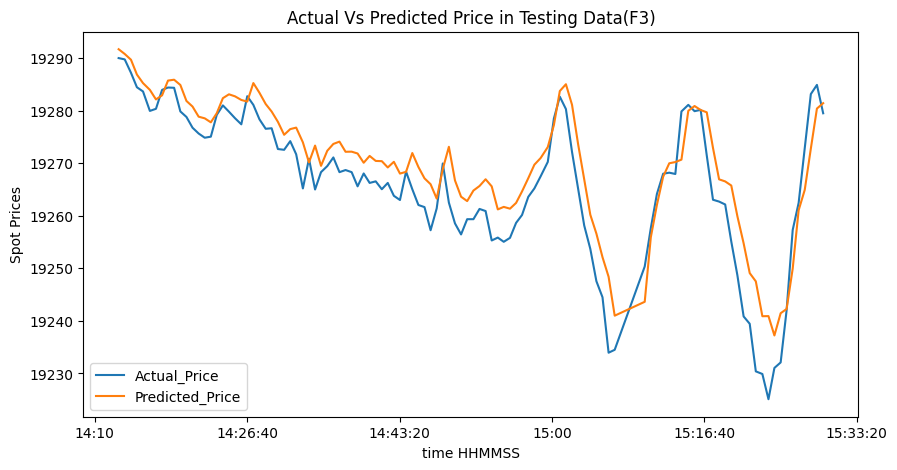

In [ ]:
#FIGURE
dfr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':y_pred})
dfr.loc[:,['Actual_Price','Predicted_Price']].plot( mark_right=False, figsize = (10,5),grid=False)
plt.ylabel("Spot Prices")
plt.title("Actual Vs Predicted Price in Testing Data(F3)")


In [ ]:
# Model 2) Regression using Past Spot Prices Only
X1 = data[['Spot Price Past Values']]
y1 = data['Spot price ltp NIFTY50']
scaler=StandardScaler()
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2 , shuffle=False,random_state = 0)
X_train_normalized1 = scaler.fit_transform(x_train1)
X_test_normalized1 = scaler.transform(x_test1)

regressor1=LinearRegression()
model1=regressor1.fit(X_train_normalized1,y_train1)
regressor1.intercept_,regressor1.coef_

y_pred_train1=regressor1.predict(X_train_normalized1)
y_pred1=regressor1.predict(X_test_normalized1)

In [ ]:
y_pred_train_new=regressor1.predict(X_train_normalized1)
y_pred_new=regressor1.predict(X_test_normalized1)
accuracy_new=model1.score(X_train_normalized1,y_train1)
accuracy1_new=model1.score(X_test_normalized1,y_test1)
print("Training Accuracy:", accuracy_new)
print("Testing  Accuracy:", accuracy1_new)
print("MSE(Testing): ",mean_squared_error(y_test1, y_pred1))
print("MSE(Training): ",mean_squared_error(y_train1, y_pred_train1))
print("RMSE(Training):",np.sqrt(mean_squared_error(y_train1,y_pred_train1)))
print("RMSE(Testing):",np.sqrt(mean_squared_error(y_test1,y_pred1)))
print("R2 Score(TR): ",r2_score(y_train1, y_pred_train1))
print("R2 Score(Testing): ",r2_score(y_pred1, y_test1))

Training Accuracy: 0.9843106196360824
Testing  Accuracy: 0.8820136049518742
MSE(Testing):  23.44066991771055
MSE(Training):  10.407314031127392
RMSE(Training): 3.226036892400239
RMSE(Testing): 4.841556559383619
R2 Score(TR):  0.9843106196360824
R2 Score(Testing):  0.8817551163070155


In [ ]:
new_index=data.index.values
size = int(len(new_index) * 0.66)
new_index1, new_index2 = new_index[0:size], new_index[size:len(X)]

Text(0.5, 1.0, 'Actual Vs Predicted Price in Testing Data (F1)')

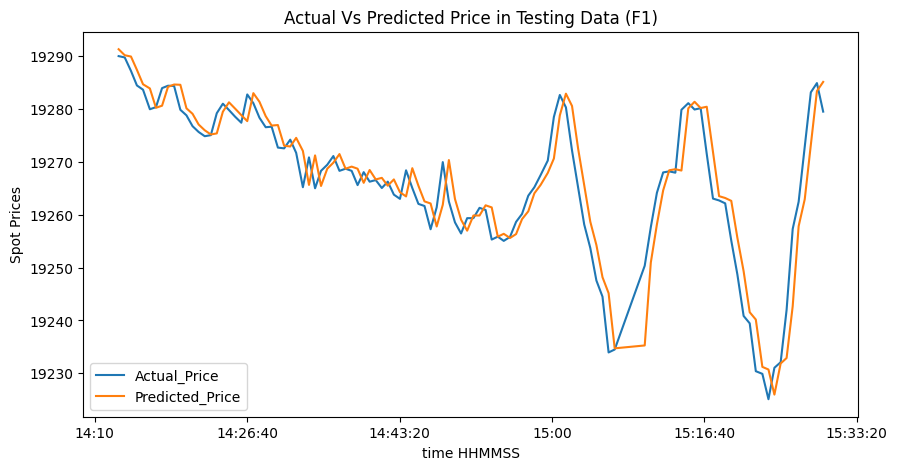

In [ ]:
#FIGURE
dfr1=pd.DataFrame({'Actual_Price':y_test1, 'Predicted_Price':y_pred1})
dfr1.loc[:,['Actual_Price','Predicted_Price']].plot( mark_right=False, figsize = (10,5),grid=False)
plt.ylabel("Spot Prices")
plt.title("Actual Vs Predicted Price in Testing Data (F1)")